In [17]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [18]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [19]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


Text(0.5, 1.0, 'Label')

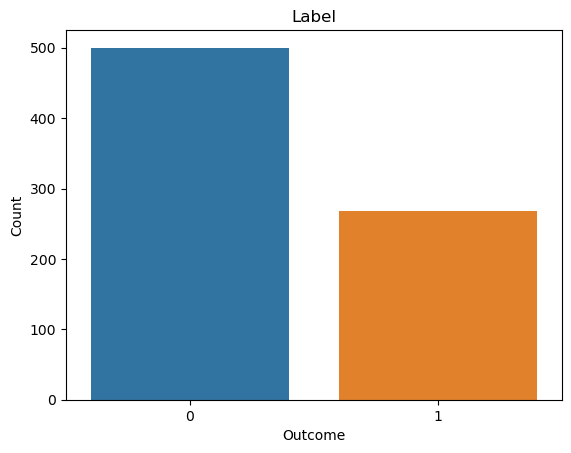

In [22]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Label")

In [25]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
y = df["Outcome"]
y.value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [24]:
x = df.drop("Outcome" , axis = 1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30


# 원-핫 인코딩

In [28]:
Y = pd.get_dummies(y).values
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [29]:
X = x.values

In [30]:
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 7)                 56        
                                                                 
 dense_21 (Dense)            (None, 10)                80        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 2)                 22        
                                                                 
Total params: 268
Trainable params: 268
Non-trainable params: 0
_________________________________________________________________


/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [43]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6401 - val_loss: 0.6155 - val_accuracy: 0.6948
Epoch 2/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6384 - val_loss: 0.6108 - val_accuracy: 0.6948
Epoch 3/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6401 - val_loss: 0.6299 - val_accuracy: 0.6948
Epoch 4/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6401 - val_loss: 0.6185 - val_accuracy: 0.6948
Epoch 5/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6401 - val_loss: 0.6140 - val_accuracy: 0.6948
Epoch 6/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6401 - val_loss: 0.6224 - val_accuracy: 0.6948
Epoch 7/30
20/20 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6401 - val_loss: 0.6211 - val_accuracy: 0.6948
Epoch 8/30
20/20 [==

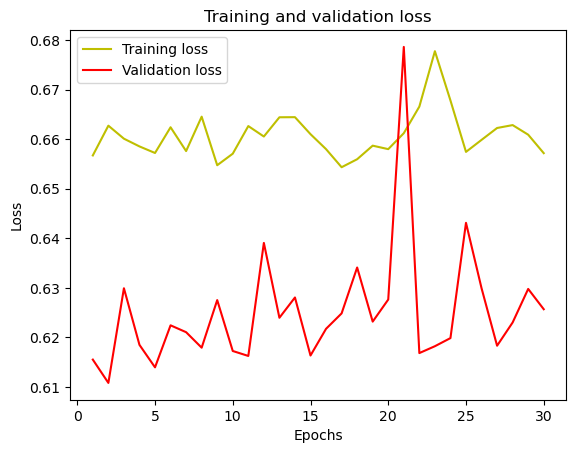

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

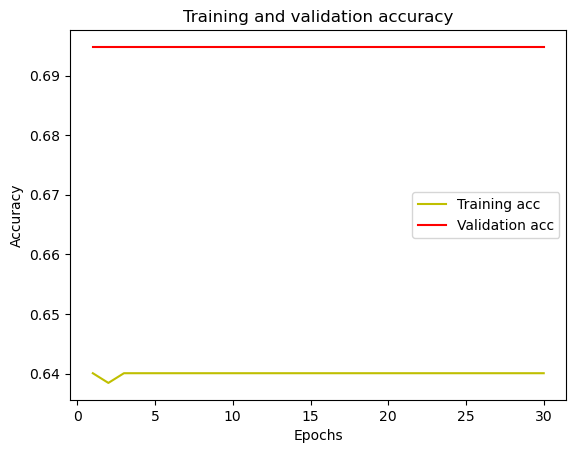

In [45]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       107
           1       0.00      0.00      0.00        47

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154

[[107   0]
 [ 47   0]]


/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
